In [5]:
# Step 1: Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [6]:
# Step 2: Load & preprocess data
df = pd.read_csv("traffic 5.csv")

# Convert to datetime and extract features
df['DateTime'] = pd.to_datetime(df['DateTime'])
df['Hour'] = df['DateTime'].dt.hour
df['Day'] = df['DateTime'].dt.dayofweek

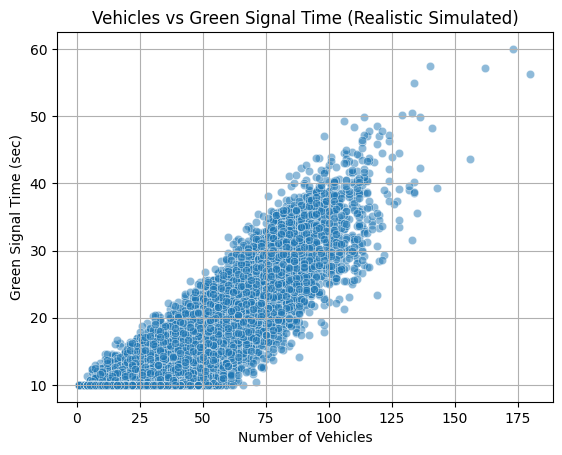

In [7]:
# Step 3: Simulate green signal time more realistically
# Real signal timing can be 0.2 to 0.4 seconds per vehicle depending on traffic
np.random.seed(42)
df['green_time'] = df['Vehicles'] * np.random.uniform(0.25, 0.4, len(df))

# Add minor noise to simulate fluctuation
df['green_time'] += np.random.normal(0, 3, size=len(df))

# Clip within 10 to 60 seconds
df['green_time'] = df['green_time'].clip(10, 60)

# Optional visualization
sns.scatterplot(x=df['Vehicles'], y=df['green_time'], alpha=0.5)
plt.title("Vehicles vs Green Signal Time (Realistic Simulated)")
plt.xlabel("Number of Vehicles")
plt.ylabel("Green Signal Time (sec)")
plt.grid(True)
plt.show()

In [8]:
# Step 4: Train the ML model
features = ['Vehicles', 'Hour', 'Day']
X = df[features]
y = df['green_time']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Evaluate
y_pred = model.predict(X_test)
print("MSE:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))

MSE: 4.212746197987023
R² Score: 0.7976492634943922


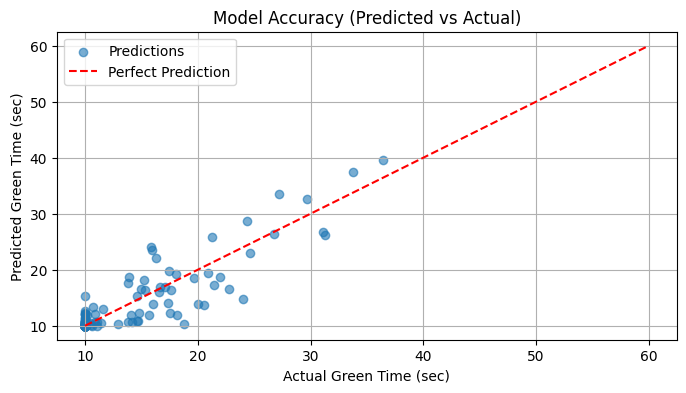

In [9]:
# Step 5: Predict and compare
plt.figure(figsize=(8, 4))
plt.scatter(y_test[:200], y_pred[:200], alpha=0.6, label="Predictions")
plt.plot([10, 60], [10, 60], color='red', linestyle='--', label="Perfect Prediction")
plt.xlabel("Actual Green Time (sec)")
plt.ylabel("Predicted Green Time (sec)")
plt.title("Model Accuracy (Predicted vs Actual)")
plt.legend()
plt.grid(True)
plt.show()

In [12]:
# Step 6: User input function (interactive prediction)
def predict_green_time():
    try:
        vehicles = int(input("Enter number of vehicles: "))
        hour = int(input("Enter current hour (0–23): "))
        day = int(input("Enter day of the week (0=Mon, 6=Sun): "))

        input_df = pd.DataFrame([[vehicles, hour, day]], columns=features)
        pred = model.predict(input_df)[0]
        pred = max(10, min(60, pred))  # Clamp to 10–60 seconds

        print(f"🔷 Predicted Green Signal Time: {round(pred, 2)} seconds")

    except Exception as e:
        print("⚠️ Invalid input! Try again.")
        print(e)

In [ ]:
while True:
    predict_green_time()
    cont = input("Do you want to predict again? (y/n): ")
    if cont.lower() != 'y':
        break

Enter number of vehicles:  10
Enter current hour (0–23):  9
Enter day of the week (0=Mon, 6=Sun):  6


🔷 Predicted Green Signal Time: 10.01 seconds


Do you want to predict again? (y/n):  y
Enter number of vehicles:  100
Enter current hour (0–23):  9
Enter day of the week (0=Mon, 6=Sun):  6


🔷 Predicted Green Signal Time: 34.22 seconds
